In [ ]:
!pip install xarray netCDF4 pandas rasterio
!pip install contextily
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.5 MB/s eta 0:00:00


# 1. Import Library

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image

# 2. Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Convert file tif ke csv

Sulawesi Utara

In [ ]:
# Buka file .tif
img = Image.open("/content/drive/MyDrive/dataset-data-mining/BATNAS_120E-125E_000-05N_MSL_v1.1.tif")
img_array = np.array(img)

# Jika citra grayscale (2D), tambahkan channel
if len(img_array.shape) == 2:
    df = pd.DataFrame(img_array)
else:
    # Jika citra RGB (3D), ubah ke format DataFrame
    h, w, c = img_array.shape
    reshaped = img_array.reshape((h * w, c))
    df = pd.DataFrame(reshaped, columns=[f"Channel_{i}" for i in range(c)])

# Simpan ke CSV
df.to_csv("BATNAS_Sulut.csv", index=False)

Kepulauan Riau

In [ ]:
# Buka file .tif
img = Image.open("/content/drive/MyDrive/dataset-data-mining/BATNAS_100E-105E_000-05N_MSL_v1.1.tif")
img_array = np.array(img)

# Jika citra grayscale (2D), tambahkan channel
if len(img_array.shape) == 2:
    df = pd.DataFrame(img_array)
else:
    # Jika citra RGB (3D), ubah ke format DataFrame
    h, w, c = img_array.shape
    reshaped = img_array.reshape((h * w, c))
    df = pd.DataFrame(reshaped, columns=[f"Channel_{i}" for i in range(c)])

# Simpan ke CSV
df.to_csv("BATNAS_Riau", index=False)

## Convert file nc ke csv

Sulawesi Utara

In [ ]:
# Buka file NetCDF
ds = xr.open_dataset("/content/drive/MyDrive/dataset-data-mining/cmems_mod_glo_phy_anfc_merged-uv_PT1H-i_1753806523157.nc")

# Ambil variabel utide dan vtide
utide = ds["utide"]
vtide = ds["vtide"]

# Gabungkan jadi satu Dataset
ds_uv = xr.merge([utide, vtide])

# Konversi ke DataFrame dan reset index
df = ds_uv.to_dataframe().reset_index()

# Filter hanya data permukaan (karena hanya ada 1 depth, bisa otomatis)
if "depth" in df.columns:
    df = df[df["depth"] == df["depth"].min()]

# Simpan ke CSV
df.to_csv("tide_currents_sulut.csv", index=False)

print("✅ Data berhasil dikonversi dan disimpan ke 'tide_currents_output.csv'")


✅ Data berhasil dikonversi dan disimpan ke 'tide_currents_output.csv'


In [ ]:
# Load dataset lokasi
df_bitung = pd.read_csv('/content/drive/MyDrive/dataset-data-mining/Bitung.csv')
df_likupang = pd.read_csv('/content/drive/MyDrive/dataset-data-mining/Likupang.csv')
df_manado = pd.read_csv('/content/drive/MyDrive/dataset-data-mining/Manado.csv')

# Load dataset pasang surut
df_pasang_bitung = pd.read_csv('/content/drive/MyDrive/dataset-data-mining/pasang_surut_bitung.csv')
df_pasang_likupang = pd.read_csv('/content/drive/MyDrive/dataset-data-mining/pasang_surut_Likupang.csv')
df_pasang_manado = pd.read_csv('/content/drive/MyDrive/dataset-data-mining/pasang_surut_manado.csv')

# Cek data yang telah dimuat
print("Bitung:", df_bitung.shape)
print("Likupang:", df_likupang.shape)
print("Manado:", df_manado.shape)
print("Pasang Bitung:", df_pasang_bitung.shape)
print("Pasang Likupang:", df_pasang_likupang.shape)
print("Pasang Manado:", df_pasang_manado.shape)

Bitung: (13392, 4)
Likupang: (17106, 4)
Manado: (5328, 4)
Pasang Bitung: (358, 3)
Pasang Likupang: (364, 3)
Pasang Manado: (163, 3)


In [ ]:
print("--- Info dan Describe df_bitung ---")
df_bitung.info()
display(df_bitung.describe())

print("\n--- Info dan Describe df_likupang ---")
df_likupang.info()
display(df_likupang.describe())

print("\n--- Info dan Describe df_manado ---")
df_manado.info()
display(df_manado.describe())

print("\n--- Info dan Describe df_pasang_bitung ---")
df_pasang_bitung.info()
display(df_pasang_bitung.describe())

print("\n--- Info dan Describe df_pasang_likupang ---")
df_pasang_likupang.info()
display(df_pasang_likupang.describe())

print("\n--- Info dan Describe df_pasang_manado ---")
df_pasang_manado.info()
display(df_pasang_manado.describe())

--- Info dan Describe df_bitung ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13392 entries, 0 to 13391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13392 non-null  object 
 1   EST     13392 non-null  float64
 2   MSL     13392 non-null  float64
 3   LAT     13392 non-null  float64
dtypes: float64(3), object(1)
memory usage: 418.6+ KB


,EST,MSL,LAT
count,13392.000000,13392.000000,13392.000000
mean,1.053020,0.016604,0.803100
std,0.348031,0.347981,0.348021
min,0.300000,-0.730000,0.050000
25%,0.800000,-0.240000,0.550000
50%,1.010000,-0.030000,0.760000
75%,1.280000,0.240000,1.030000
max,2.090000,1.050000,1.840000



--- Info dan Describe df_likupang ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17106 entries, 0 to 17105
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    17106 non-null  object 
 1   EST     17106 non-null  float64
 2   MSL     17106 non-null  float64
 3   LAT     17106 non-null  float64
dtypes: float64(3), object(1)
memory usage: 534.7+ KB


,EST,MSL,LAT
count,17106.000000,17106.000000,17106.000000
mean,1.506457,-0.114840,0.758630
std,0.376787,0.376848,0.376802
min,0.750000,-0.870000,0.000000
25%,1.240000,-0.380000,0.490000
50%,1.430000,-0.190000,0.680000
75%,1.750000,0.130000,1.000000
max,2.510000,0.880000,1.760000



--- Info dan Describe df_manado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5328 non-null   object 
 1   EST     5328 non-null   float64
 2   MSL     5328 non-null   float64
 3   LAT     5328 non-null   float64
dtypes: float64(3), object(1)
memory usage: 166.6+ KB


,EST,MSL,LAT
count,5328.000000,5328.000000,5328.000000
mean,2.225009,0.007538,1.198675
std,0.489662,0.489737,0.489739
min,1.030000,-1.190000,0.000000
25%,1.900000,-0.320000,0.870000
50%,2.190000,-0.030000,1.160000
75%,2.560000,0.340000,1.530000
max,3.600000,1.380000,2.570000



--- Info dan Describe df_pasang_bitung ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Waktu           358 non-null    object 
 1   Ketinggian (m)  358 non-null    float64
 2   Jenis           358 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.5+ KB


,Ketinggian (m)
count,358.000000
mean,0.012458
std,0.458916
min,-0.730000
25%,-0.377500
50%,-0.065000
75%,0.360000
max,1.050000



--- Info dan Describe df_pasang_likupang ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Waktu           364 non-null    object 
 1   Ketinggian (m)  364 non-null    float64
 2   Jenis           364 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.7+ KB


,Ketinggian (m)
count,364.000000
mean,-0.101319
std,0.479130
min,-0.870000
25%,-0.422500
50%,-0.235000
75%,0.270000
max,0.880000



--- Info dan Describe df_pasang_manado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Waktu           163 non-null    object 
 1   Ketinggian (m)  163 non-null    float64
 2   Jenis           163 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.9+ KB


,Ketinggian (m)
count,163.000000
mean,0.013865
std,0.636350
min,-1.190000
25%,-0.455000
50%,-0.020000
75%,0.475000
max,1.380000


In [ ]:
# Load data elevasi permukaan laut rata-rata
df_batnas = pd.read_csv('BATNAS_Sulut.csv')
print("Elevasi permukaan laut rata-rata:", df_batnas.shape)

Elevasi permukaan laut rata-rata: (3000, 3000)


In [ ]:
print("\n--- Info dan Describe df_batnas ---")
df_batnas.info()
display(df_batnas.describe())


--- Info dan Describe df_batnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 3000 entries, 0 to 2999
dtypes: float64(3000)
memory usage: 68.7 MB


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-2966.588459,-2967.391506,-2968.091441,-2968.987905,-2969.850275,-2970.673886,-2971.490120,-2972.041346,-2972.435317,-2972.932154,...,-3051.147341,-3049.093562,-3047.111672,-3044.989583,-3043.061778,-3041.735103,-3040.341482,-3039.034873,-3037.411365,-3035.330711
std,1746.302917,1746.412316,1746.815931,1747.266531,1747.485397,1748.170672,1749.389319,1750.855540,1753.225593,1755.752874,...,1947.770564,1947.420745,1946.996046,1946.872822,1946.930846,1947.181396,1947.837309,1948.926455,1950.143034,1950.867230
min,-5224.749000,-5226.053700,-5227.214400,-5228.192400,-5228.949000,-5229.456000,-5229.737300,-5229.719700,-5229.413600,-5228.747600,...,-5764.445300,-5761.352500,-5751.900000,-5746.098600,-5742.475000,-5740.478000,-5738.702600,-5731.008000,-5726.962400,-5725.971000
25%,-4181.031900,-4182.961550,-4187.708825,-4190.508375,-4195.604225,-4198.417875,-4201.742300,-4206.415975,-4211.112750,-4214.896375,...,-4827.324925,-4836.993775,-4842.037500,-4850.692625,-4852.871675,-4853.121725,-4853.539175,-4852.728000,-4851.013250,-4851.738675
50%,-3163.636500,-3163.786350,-3162.249500,-3162.518550,-3164.251150,-3162.100600,-3161.842050,-3160.505250,-3160.423150,-3160.368000,...,-3340.354250,-3331.296000,-3325.382450,-3321.471450,-3311.620900,-3302.892500,-3294.257100,-3289.327600,-3283.824450,-3276.549250
75%,-2265.425325,-2287.409575,-2304.226950,-2312.730325,-2317.859225,-2320.116300,-2326.086225,-2333.334875,-2333.104025,-2334.218350,...,-1418.230100,-1413.731475,-1407.173475,-1402.804700,-1393.878900,-1383.917625,-1371.253075,-1361.245725,-1351.070700,-1346.685075
max,1019.291800,1050.642200,1068.042000,1074.872700,1063.286700,1061.800900,1068.752800,1073.121600,1070.265300,1059.354000,...,1017.644300,989.962600,992.458440,1000.678040,994.542400,971.279360,928.030400,880.307560,837.754700,847.617400


In [ ]:
# Load hasil konversi arus laut dari NetCDF
df_tide_current = pd.read_csv('tide_currents_sulut.csv')
print("Arus Laut:", df_tide_current.shape)

Arus Laut: (8154060, 6)


In [ ]:
print("\n--- Info dan Describe df_tide_current ---")
df_tide_current.info()
df_tide_current.describe()


--- Info dan Describe df_tide_current ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154060 entries, 0 to 8154059
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   depth      float64
 2   latitude   float64
 3   longitude  float64
 4   utide      float64
 5   vtide      float64
dtypes: float64(5), object(1)
memory usage: 373.3+ MB


,depth,latitude,longitude,utide,vtide
count,8.154060e+06,8.154060e+06,8.154060e+06,6.930951e+06,6.930951e+06
mean,4.940250e-01,1.500000e+00,1.234584e+02,-2.382852e-05,-2.073227e-05
std,6.585810e-11,8.897566e-01,1.443175e+00,4.907252e-02,4.574558e-02
min,4.940250e-01,0.000000e+00,1.210000e+02,-1.777344e+00,-2.430664e+00
25%,4.940250e-01,7.500000e-01,1.222292e+02,-7.812500e-03,-2.929688e-03
50%,4.940250e-01,1.500000e+00,1.234584e+02,0.000000e+00,0.000000e+00
75%,4.940250e-01,2.250000e+00,1.246875e+02,7.812500e-03,1.953125e-03
max,4.940250e-01,3.000000e+00,1.259167e+02,1.902344e+00,2.066406e+00


In [ ]:
df_jarak= pd.read_csv('/content/drive/MyDrive/dataset-data-mining/proximity_to_grid_sulut_preprocesing.csv')
df_jarak.head()

,Nama Lokasi,Lat_G,Long_G,Lat_L,Long_L,Jarak (km),Arah (derajat)
0,Manado,1456944,124855000,149500,12483611,471,33374
1,Bitung,144583,12518917,143444,12517806,175,22381
2,Likupang,165778,12509361,167778,12509583,223,668


In [ ]:
df_jarak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nama Lokasi     3 non-null      object
 1   Lat_G           3 non-null      int64 
 2   Long_G          3 non-null      int64 
 3   Lat_L           3 non-null      int64 
 4   Long_L          3 non-null      int64 
 5   Jarak (km)      3 non-null      int64 
 6   Arah (derajat)  3 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 300.0+ bytes


## 📍 DataFrame: `df_bitung`, `df_likupang`, `df_manado`
Data hasil observasi pasang surut dari tiga lokasi berbeda.

| Kolom | Deskripsi |
|-------|-----------|
| `Date` | Tanggal dan waktu observasi (format string) |
| `EST`  | Estimasi elevasi permukaan laut (dalam meter) |
| `MSL`  | Nilai permukaan laut relatif terhadap Mean Sea Level |
| `LAT`  | Penyesuaian elevasi berdasarkan letak geografis (Latitude Adjustment Term) |

---

## 🌊 DataFrame: `df_pasang_bitung`, `df_pasang_likupang`, `df_pasang_manado`
Data prediksi pasang surut berdasarkan waktu dan jenis.

| Kolom             | Deskripsi |
|-------------------|-----------|
| `Waktu`           | Tanggal dan waktu kejadian pasang surut |
| `Ketinggian (m)`  | Tinggi permukaan laut dalam meter |
| `Jenis`           | Tipe kejadian: `"Pasang"` atau `"Surut"` |

---

## 🗺️ DataFrame: `df_batnas`
Data raster elevasi permukaan laut dari file BATNAS (hasil konversi GeoTIFF ke DataFrame 2D).

| Kolom / Baris     | Deskripsi |
|-------------------|-----------|
| `0`–`2999` (kolom) | Representasi grid longitudinal |
| `0`–`2999` (baris) | Representasi grid latitudinal |
| Nilai sel         | Kedalaman laut (meter), bernilai negatif jika laut, positif jika darat |

> Catatan: Koordinat geografis perlu dihitung berdasarkan resolusi grid dan metadata GeoTIFF.

---

## 🌐 DataFrame: `df_tide_current`
Data hasil konversi dari NetCDF CMEMS, berisi informasi arus laut permukaan.

| Kolom      | Deskripsi |
|------------|-----------|
| `time`     | Waktu observasi arus laut (format ISO datetime) |
| `depth`    | Kedalaman pengamatan (biasanya 0.494 m = permukaan) |
| `latitude` | Lintang lokasi |
| `longitude`| Bujur lokasi |
| `utide`    | Komponen kecepatan arus arah timur–barat (m/s) |
| `vtide`    | Komponen kecepatan arus arah utara–selatan (m/s) |


# 3. Data Preprocessing

Feature Engineering tidal_range

In [ ]:
print('Cek Data Null bitung')
display(df_bitung.isnull().sum())

print('\nCek Data Null likupang')
display(df_likupang.isnull().sum())

print('\nCek data null manado')
display(df_manado.isnull().sum())

print('\nCek Data Null pasang bitung')
display(df_pasang_bitung.isnull().sum())

print('\nCek Data Null pasang likupang')
display(df_pasang_likupang.isnull().sum())

print('\nCek Data Null pasang manado')
display(df_pasang_manado.isnull().sum())

Cek Data Null bitung


,0
Date,0
EST,0
MSL,0
LAT,0



Cek Data Null likupang


,0
Date,0
EST,0
MSL,0
LAT,0



Cek data null manado


,0
Date,0
EST,0
MSL,0
LAT,0



Cek Data Null pasang bitung


,0
Waktu,0
Ketinggian (m),0
Jenis,0



Cek Data Null pasang likupang


,0
Waktu,0
Ketinggian (m),0
Jenis,0



Cek Data Null pasang manado


,0
Waktu,0
Ketinggian (m),0
Jenis,0


In [ ]:
print('Cek Data Null bitung')
df_bitung.isnull().sum()

Cek Data Null bitung


,0
Date,0
EST,0
MSL,0
LAT,0


In [ ]:
df_pasang_bitung.isnull().sum()

,0
Waktu,0
Ketinggian (m),0
Jenis,0


In [ ]:
print('Cek Data Null likupang')
df_likupang.isnull().sum()

Cek Data Null likupang


,0
Date,0
EST,0
MSL,0
LAT,0


In [ ]:
df_pasang_likupang.isnull().sum()

,0
Waktu,0
Ketinggian (m),0
Jenis,0


In [ ]:
print('Cek data null manado')
df_manado.isnull().sum()

Cek data null manado


,0
Date,0
EST,0
MSL,0
LAT,0


In [ ]:
df_pasang_manado.isnull().sum()

,0
Waktu,0
Ketinggian (m),0
Jenis,0


In [ ]:
def hitung_rentang_prediksi_per_6jam(df, lat_df, lokasi_nama, waktu_col='Waktu', tinggi_col='Ketinggian (m)', jenis_col='Jenis'):
    """
    Menghitung rentang pasang surut per 6 jam dan menggabungkan LAT dari data observasi.

    Args:
        df (pd.DataFrame): DataFrame prediksi pasang-surut (df_pasang_xxx).
        lat_df (pd.DataFrame): DataFrame observasi dengan kolom Date dan LAT.
        lokasi_nama (str): Nama lokasi.
        waktu_col (str): Nama kolom waktu prediksi.
        tinggi_col (str): Nama kolom ketinggian.
        jenis_col (str): Nama kolom jenis pasang/surut.

    Returns:
        pd.DataFrame: DataFrame dengan waktu interval 6 jam, tidal range, LAT, dan lokasi.
    """
    temp_df = df.copy()
    temp_df[waktu_col] = pd.to_datetime(temp_df[waktu_col])
    temp_df['waktu_6jam'] = temp_df[waktu_col].dt.floor('6H')  # Pembulatan ke 6 jam

    # Pisahkan pasang dan surut
    df_pasang = temp_df[temp_df[jenis_col] == 'Pasang']
    df_surut = temp_df[temp_df[jenis_col] == 'Surut']

    # Kelompokkan dan cari nilai maksimum & minimum tiap 6 jam
    max_6jam_pasang = df_pasang.groupby('waktu_6jam')[tinggi_col].max()
    min_6jam_surut = df_surut.groupby('waktu_6jam')[tinggi_col].min()

    # Gabungkan hasil
    interval_df = pd.DataFrame({
        'ketinggian_max_pasang': max_6jam_pasang,
        'ketinggian_min_surut': min_6jam_surut
    }).dropna()

    # Hitung rentang
    interval_df['tidal_range_6jam'] = interval_df['ketinggian_max_pasang'] - interval_df['ketinggian_min_surut']

    # Proses LAT dari observasi
    lat_df['Date'] = pd.to_datetime(lat_df['Date'])
    lat_df['waktu_6jam'] = lat_df['Date'].dt.floor('6H')

    lat_per_6jam = lat_df.groupby('waktu_6jam')['LAT'].mean()

    # Gabungkan berdasarkan waktu 6 jam
    hasil = interval_df.join(lat_per_6jam, on='waktu_6jam')
    hasil['lokasi'] = lokasi_nama

    return hasil.reset_index()[['waktu_6jam', 'tidal_range_6jam', 'LAT', 'lokasi']]


In [ ]:
range_bitung_lat = hitung_rentang_prediksi_per_6jam(df_pasang_bitung,df_bitung, 'Bitung')
range_likupang_lat = hitung_rentang_prediksi_per_6jam(df_pasang_likupang,df_likupang, 'Likupang')
range_manado_lat = hitung_rentang_prediksi_per_6jam(df_pasang_manado, df_manado, 'Manado')

# Gabungkan semua lokasi
df_tidal_range_lat = pd.concat([range_bitung_lat, range_likupang_lat, range_manado_lat], ignore_index=True)

/tmp/ipython-input-1680319492.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp_df['waktu_6jam'] = temp_df[waktu_col].dt.floor('6H')  # Pembulatan ke 6 jam
/tmp/ipython-input-1680319492.py:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lat_df['waktu_6jam'] = lat_df['Date'].dt.floor('6H')
/tmp/ipython-input-1680319492.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp_df['waktu_6jam'] = temp_df[waktu_col].dt.floor('6H')  # Pembulatan ke 6 jam
/tmp/ipython-input-1680319492.py:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lat_df['waktu_6jam'] = lat_df['Date'].dt.floor('6H')
/tmp/ipython-input-1680319492.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  temp_df['waktu_6jam'] = temp_df[waktu_col].dt.f

In [ ]:
df_tidal_range_lat

,waktu_6jam,tidal_range_6jam,LAT,lokasi
0,2025-05-17 12:00:00,0.39,0.605278,Bitung
1,2025-05-18 12:00:00,0.25,0.649722,Bitung
2,2025-05-19 12:00:00,0.11,0.698056,Bitung
3,2025-05-30 06:00:00,0.63,0.505833,Bitung
4,2025-05-31 12:00:00,0.35,0.645000,Bitung
...,...,...,...,...
64,2025-07-08 18:00:00,0.52,1.908611,Manado
65,2025-07-09 00:00:00,1.55,0.669167,Manado
66,2025-07-12 18:00:00,1.36,0.816111,Manado
67,2025-08-01 00:00:00,0.66,1.415556,Manado


In [ ]:
# df_tidal_range_lat[df_tidal_range_lat['lokasi'] == 'Bitung'].count()
df_tidal_range_lat.describe()

,waktu_6jam,tidal_range_6jam,LAT
count,69,69.000000,69.000000
mean,2025-06-23 00:05:13.043478272,0.306957,0.816580
min,2025-05-07 06:00:00,0.000000,0.423333
25%,2025-06-04 00:00:00,0.040000,0.627222
50%,2025-06-23 12:00:00,0.140000,0.688611
75%,2025-07-14 18:00:00,0.510000,0.816111
max,2025-08-07 00:00:00,1.550000,1.908611
std,NaN,0.351561,0.346010


In [ ]:
df_tidal_range_lat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   waktu_6jam        69 non-null     datetime64[ns]
 1   tidal_range_6jam  69 non-null     float64       
 2   LAT               69 non-null     float64       
 3   lokasi            69 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.3+ KB


Feature Engineering Kecepatan arus

In [ ]:
df_kecepatan_arus = df_tide_current.copy()
df_kecepatan_arus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154060 entries, 0 to 8154059
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   depth      float64
 2   latitude   float64
 3   longitude  float64
 4   utide      float64
 5   vtide      float64
dtypes: float64(5), object(1)
memory usage: 373.3+ MB


In [ ]:

# 1. Pastikan tidak ada nilai yang hilang (NaN) di kolom utide dan vtide.
#    Jika ada, isi dengan 0 atau metode lain yang sesuai.
df_kecepatan_arus['utide'].fillna(0, inplace=True)
df_kecepatan_arus['vtide'].fillna(0, inplace=True)

# 2. Hitung kecepatan total menggunakan NumPy untuk performa maksimal.
#    np.square() mengkuadratkan setiap elemen.
#    np.sqrt() menghitung akar kuadrat dari hasilnya.
df_kecepatan_arus['total_tidal_speed'] = np.sqrt(np.square(df_kecepatan_arus['utide']) + np.square(df_kecepatan_arus['vtide']))

/tmp/ipython-input-681806123.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_kecepatan_arus['utide'].fillna(0, inplace=True)
/tmp/ipython-input-681806123.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
df_kecepatan_arus

,time,depth,latitude,longitude,utide,vtide,total_tidal_speed
0,2025-03-07 23:00:00,0.494025,0.0,121.000015,-0.003906,-0.001953,0.004367
1,2025-03-07 23:00:00,0.494025,0.0,121.083350,-0.004883,-0.002930,0.005694
2,2025-03-07 23:00:00,0.494025,0.0,121.166690,-0.005859,-0.002930,0.006551
3,2025-03-07 23:00:00,0.494025,0.0,121.250015,-0.007812,-0.003906,0.008735
4,2025-03-07 23:00:00,0.494025,0.0,121.333350,-0.008789,-0.006836,0.011135
...,...,...,...,...,...,...,...
8154055,2025-08-07 23:00:00,0.494025,3.0,125.583350,0.151367,-0.010742,0.151748
8154056,2025-08-07 23:00:00,0.494025,3.0,125.666690,0.102539,0.040039,0.110079
8154057,2025-08-07 23:00:00,0.494025,3.0,125.750015,0.019531,-0.030273,0.036027
8154058,2025-08-07 23:00:00,0.494025,3.0,125.833350,0.008789,-0.028320,0.029653


In [ ]:
df_kecepatan_arus.describe(include='all')

,time,depth,latitude,longitude,utide,vtide,total_tidal_speed
count,8154060,8.154060e+06,8.154060e+06,8.154060e+06,8.154060e+06,8.154060e+06,8.154060e+06
unique,3673,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-08-07 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,2220,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.940250e-01,1.500000e+00,1.234584e+02,-2.025424e-05,-1.762243e-05,2.214667e-02
std,NaN,6.585810e-11,8.897566e-01,1.443175e+00,4.524263e-02,4.217534e-02,5.775102e-02
min,NaN,4.940250e-01,0.000000e+00,1.210000e+02,-1.777344e+00,-2.430664e+00,0.000000e+00
25%,NaN,4.940250e-01,7.500000e-01,1.222292e+02,-5.859375e-03,-1.953125e-03,2.762136e-03
50%,NaN,4.940250e-01,1.500000e+00,1.234584e+02,0.000000e+00,0.000000e+00,7.812500e-03
75%,NaN,4.940250e-01,2.250000e+00,1.246875e+02,5.859375e-03,9.765625e-04,1.886055e-02


Preprocessing Data Batnas

In [ ]:
# Reset indeks baris agar menjadi kolom, agar kita bisa melacaknya.
df_long = df_batnas.reset_index().rename(columns={'index': 'row'})

# Gunakan pd.melt() untuk melakukan unpivot
df_tidy = df_long.melt(
    id_vars=['row'],
    var_name='col',
    value_name='depth'
)

# Ubah tipe data kolom 'col' menjadi integer
df_tidy['col'] = df_tidy['col'].astype(int)

print("\nDataFrame setelah di-Unpivot/Melt:")
df_tidy.head()


DataFrame setelah di-Unpivot/Melt:


,row,col,depth
0,0,0,4.564403
1,1,0,5.051350
2,2,0,5.320685
3,3,0,5.469303
4,4,0,5.589708


In [ ]:
# Filter untuk hanya menyimpan piksel yang merupakan laut (kedalaman < 0)
df_sea = df_tidy[df_tidy['depth'] < 0].copy()

print(f"\nJumlah piksel awal: {len(df_tidy)}")
print(f"Jumlah piksel setelah filter daratan: {len(df_sea)}")


Jumlah piksel awal: 9000000
Jumlah piksel setelah filter daratan: 7930623


In [ ]:
import rasterio

# Open the original .tif file to get the geotransform
with rasterio.open("/content/drive/MyDrive/dataset-data-mining/BATNAS_120E-125E_000-05N_MSL_v1.1.tif") as src:
    geotransform = src.transform

# Fungsi transform dari rasterio/affine akan mengalikan
# indeks kolom dan baris dengan geotransform untuk mendapatkan koordinat.
# Penting: rasterio biasanya menggunakan (col, row) bukan (row, col) untuk transform.
longitudes, latitudes = rasterio.transform.xy(
    transform=geotransform,
    rows=df_sea['row'].values,
    cols=df_sea['col'].values,
    offset='center' # 'center' untuk mendapatkan koordinat tengah piksel
)

# Buat kolom baru di DataFrame hasil
df_sea['longitude'] = longitudes
df_sea['latitude'] = latitudes

# Pilih dan urutkan ulang kolom agar lebih rapi
df_final_batnas = df_sea[['latitude', 'longitude', 'depth']]

print("\nDataFrame Batnas Final (Siap Digunakan):")
df_final_batnas.head()
df_final_batnas.to_csv('df_final_batnas.csv', index=False)


DataFrame Batnas Final (Siap Digunakan):


In [ ]:
df_final_batnas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7930623 entries, 29 to 8999999
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   latitude   float64
 1   longitude  float64
 2   depth      float64
dtypes: float64(3)
memory usage: 242.0 MB


Data jarak proximitri ke grid

In [ ]:
df_jarak.head()

,Nama Lokasi,Lat_G,Long_G,Lat_L,Long_L,Jarak (km),Arah (derajat)
0,Manado,1456944,124855000,149500,12483611,471,33374
1,Bitung,144583,12518917,143444,12517806,175,22381
2,Likupang,165778,12509361,167778,12509583,223,668


In [ ]:
df_jarak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nama Lokasi     3 non-null      object
 1   Lat_G           3 non-null      int64 
 2   Long_G          3 non-null      int64 
 3   Lat_L           3 non-null      int64 
 4   Long_L          3 non-null      int64 
 5   Jarak (km)      3 non-null      int64 
 6   Arah (derajat)  3 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 300.0+ bytes


In [ ]:
df_jarak.rename(columns= {'Nama Lokasi': 'Lokasi'})

,Lokasi,Lat_G,Long_G,Lat_L,Long_L,Jarak (km),Arah (derajat)
0,Manado,1456944,124855000,149500,12483611,471,33374
1,Bitung,144583,12518917,143444,12517806,175,22381
2,Likupang,165778,12509361,167778,12509583,223,668


In [ ]:
# Rename the 'Nama Lokasi' column to 'Lokasi'
df_jarak = df_jarak.rename(columns={'Nama Lokasi': 'Lokasi'})

df_jarak['latitude_gi'] = df_jarak['Lat_G'] / 1000000
df_jarak['longitude_gi'] = df_jarak['Long_G'] / 1000000

# Pilih kolom yang relevan
df_gardu_induk = df_jarak[['Lokasi', 'latitude_gi', 'longitude_gi']]

print("=== DataFrame Gardu Induk Setelah Koreksi Skala ===")
print(df_gardu_induk)

=== DataFrame Gardu Induk Setelah Koreksi Skala ===
     Lokasi  latitude_gi  longitude_gi
0    Manado     1.456944    124.855000
1    Bitung     0.144583     12.518917
2  Likupang     0.165778     12.509361


Merge semua dataset


In [ ]:
# 1. Definisikan pemetaan Anda dalam sebuah dictionary (kamus).
#    Ini adalah hasil dari Langkah 1 & 2.
#    Formatnya: {'Nama Lokasi': (Latitude, Longitude)}
coordinate_map = {
    # Koordinat ini SANGAT PENTING. Dapatkan dari sumber yang akurat.
    'Bitung': (1.4589, 125.2178),
    'Likupang': (1.6986, 125.0144),
    'Manado': (1.4978, 124.8394)
}

# 2. Ubah kamus tersebut menjadi DataFrame yang terstruktur.
#    Kode ini secara otomatis akan memecah tuple koordinat menjadi kolom 'latitude' dan 'longitude'.
df_lokasi = pd.DataFrame(list(coordinate_map.items()), columns=['lokasi', 'coordinates'])
df_lokasi[['latitude', 'longitude']] = pd.DataFrame(df_lokasi['coordinates'].tolist(), index=df_lokasi.index)
df_lokasi.drop(columns='coordinates', inplace=True)

# 3. Tampilkan untuk verifikasi
print("=== DataFrame Pemetaan Lokasi yang Berhasil Dibuat ===")
print(df_lokasi)

=== DataFrame Pemetaan Lokasi yang Berhasil Dibuat ===
     lokasi  latitude  longitude
0    Bitung    1.4589   125.2178
1  Likupang    1.6986   125.0144
2    Manado    1.4978   124.8394


In [ ]:
# --- Tahap 1: AGREGASI SEMUA DATA SUMBER TERLEBIH DAHULU ---

# A. Agregasi Kecepatan (Dari jawaban sebelumnya)
max_speed_per_location = df_kecepatan_arus.groupby(['latitude', 'longitude'])['total_tidal_speed'].max().reset_index()
max_speed_per_location.rename(columns={'total_tidal_speed': 'max_tidal_speed'}, inplace=True)

# B. Agregasi Batimetri

# C. Agregasi Tidal Range (Anda sudah lakukan)
avg_range_per_location = df_tidal_range_lat.groupby('lokasi')['tidal_range_6jam'].mean().reset_index()
avg_range_per_location.rename(columns={'tidal_range_6jam': 'mean_tidal_range'}, inplace=True)

In [ ]:
# --- Tahap 2: MEMBUAT GEODATAFRAMES DARI DATA YANG SUDAH DIAGREGASI ---

# A. Lokasi target Anda
df_lokasi_studi = pd.DataFrame(coordinate_map.items(), columns=['lokasi', 'coordinates'])
df_lokasi_studi[['latitude', 'longitude']] = pd.DataFrame(df_lokasi_studi['coordinates'].tolist(), index=df_lokasi_studi.index)
gdf_lokasi_studi = gpd.GeoDataFrame(
    df_lokasi_studi.drop(columns='coordinates'),
    geometry=gpd.points_from_xy(df_lokasi_studi.longitude, df_lokasi_studi.latitude),
    crs="EPSG:4326"
)


# B. Grid Kecepatan
gdf_kecepatan = gpd.GeoDataFrame(
    max_speed_per_location,
    geometry=gpd.points_from_xy(max_speed_per_location.longitude, max_speed_per_location.latitude),
    crs="EPSG:4326"
)

# C. Grid Batimetri
gdf_batnas = gpd.GeoDataFrame(
    df_final_batnas,
    geometry=gpd.points_from_xy(df_final_batnas.longitude, df_final_batnas.latitude),
    crs="EPSG:4326"
)

# D. Grid tidal_range
# Lokasi stasiun BMKG dengan informasi tidal range
# Gabungkan dulu dengan koordinatnya sebelum jadi GeoDataFrame
df_tidal_range_berkoordinat = pd.merge(avg_range_per_location, df_lokasi, on='lokasi')
gdf_tidal_range = gpd.GeoDataFrame(
    df_tidal_range_berkoordinat,
    geometry=gpd.points_from_xy(df_tidal_range_berkoordinat.longitude, df_tidal_range_berkoordinat.latitude),
    crs="EPSG:4326"
)

# E. Grid jarak proximitri to grit
gdf_gardu_induk = gpd.GeoDataFrame(
    df_gardu_induk,
    geometry=gpd.points_from_xy(df_gardu_induk.longitude_gi, df_gardu_induk.latitude_gi),
    crs="EPSG:4326"
)


In [ ]:
# --- Tahap 3: MENGATASI PERINGATAN CRS (RE-PROJECTION) ---
# Kita proyeksikan ke UTM (Universal Transverse Mercator) yang menggunakan meter sebagai unit.
# Zona UTM untuk Sulut adalah sekitar 51N (EPSG:32651).
gdf_lokasi_studi_utm = gdf_lokasi_studi.to_crs("EPSG:32651")
gdf_kecepatan_utm = gdf_kecepatan.to_crs("EPSG:32651")
gdf_batnas_utm = gdf_batnas.to_crs("EPSG:32651")
gdf_tidal_range_utm = gdf_tidal_range.to_crs("EPSG:32651")
gdf_gardu_induk_utm = gdf_gardu_induk.to_crs("EPSG:32651")

In [ ]:
# Tahap 4: SPATIAL JOIN SECARA BERTAHAP
# ==============================================================================
# Mulai dengan grid padat (kecepatan) sebagai dasar

# 1. Gabungkan grid kecepatan dengan grid batimetri
print("Menggabungkan data kecepatan dan batimetri...")
gdf_master_grid = gpd.sjoin_nearest(gdf_kecepatan_utm, gdf_batnas_utm, how="left")
gdf_master_grid.drop(columns=['index_right'], inplace=True, errors='ignore') # errors='ignore' untuk keamanan


# 2. Gabungkan grid utama dengan informasi tidal range dari stasiun terdekat
print("Menambahkan informasi tidal range berdasarkan stasiun terdekat...")
final_dataset_gdf = gpd.sjoin_nearest(gdf_master_grid, gdf_tidal_range_utm, how="left")
# Bersihkan kolom-kolom sisa yang mungkin bertambah
columns_to_drop_after_tidal = ['index_right', 'latitude', 'longitude'] # Kolom dari gdf_tidal_range_utm
final_dataset_gdf.drop(columns=columns_to_drop_after_tidal, inplace=True, errors='ignore')

print("\n=== Dataset Sementara (Setelah Join Kecepatan, Kedalaman, Tidal Range) ===")
print(final_dataset_gdf.head())

Menggabungkan data kecepatan dan batimetri...
Menambahkan informasi tidal range berdasarkan stasiun terdekat...

=== Dataset Sementara (Setelah Join Kecepatan, Kedalaman, Tidal Range) ===
   latitude_left  longitude_left  max_tidal_speed              geometry  \
0            0.0      121.000015         0.020132   POINT (277406.23 0)   
1            0.0      121.083350         0.024898  POINT (286684.786 0)   
2            0.0      121.166690         0.030571  POINT (295963.444 0)   
3            0.0      121.250015         0.037186  POINT (305239.996 0)   
4            0.0      121.333350         0.044420  POINT (314517.247 0)   

   latitude_right  longitude_right      depth  lokasi  mean_tidal_range  
0        0.000833       121.000833 -1494.1973  Manado          0.621818  
1        0.000833       121.084167 -1420.3574  Manado          0.621818  
2        0.000833       121.167500 -1220.9587  Manado          0.621818  
3        0.000833       121.250833 -1091.8423  Manado          0.

In [ ]:
# 3. Gabungkan 'final_dataset_gdf' dengan informasi jarak gardu terdekat
print("\nMenambahkan informasi jarak ke gardu induk terdekat...")

# "Untuk setiap titik di grid kami yang sudah lengkap, cari gardu terdekat dan hitung jaraknya"
dataset_lengkap_gdf = gpd.sjoin_nearest(
    final_dataset_gdf,
    gdf_gardu_induk_utm,
    how="left",
    distance_col="distance_to_grid_m" # Otomatis membuat kolom jarak dalam meter
)


Menambahkan informasi jarak ke gardu induk terdekat...


In [ ]:
dataset_lengkap_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2220 entries, 0 to 2219
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   latitude_left        2220 non-null   float64 
 1   longitude_left       2220 non-null   float64 
 2   max_tidal_speed      2220 non-null   float64 
 3   geometry             2220 non-null   geometry
 4   latitude_right       2220 non-null   float64 
 5   longitude_right      2220 non-null   float64 
 6   depth                2220 non-null   float64 
 7   lokasi               2220 non-null   object  
 8   mean_tidal_range     2220 non-null   float64 
 9   index_right          2220 non-null   int64   
 10  Lokasi               2220 non-null   object  
 11  latitude_gi          2220 non-null   float64 
 12  longitude_gi         2220 non-null   float64 
 13  distance_to_grid_m   2220 non-null   float64 
 14  distance_to_grid_km  2220 non-null   float64 
dtypes: float64(11), ge

In [ ]:
# Tahap 5: FINAL CLEANING & PREPARATION FOR MACHINE LEARNING
# ==============================================================================

# 1. Buat kolom jarak dalam kilometer
dataset_lengkap_gdf['distance_to_grid_km'] = dataset_lengkap_gdf['distance_to_grid_m'] / 1000

# 2. Buang semua kolom yang tidak akan digunakan untuk model ML
#    Ini termasuk 'index_right', 'Lokasi' gardu, koordinat gardu, jarak dalam meter, dan geometri.
columns_to_drop_final = [
    'index_right', 'Lokasi', 'latitude_gi', 'longitude_gi',
    'distance_to_grid_m', 'geometry'
]
final_df_for_ml = pd.DataFrame(
    dataset_lengkap_gdf.drop(columns=columns_to_drop_final, errors='ignore')
)

# 3. Ganti nama kolom koordinat agar bersih
final_df_for_ml.rename(columns={
    'latitude_grid': 'latitude', # Jika nama ini masih ada
    'longitude_grid': 'longitude' # Jika nama ini masih ada
}, inplace=True)


print("\n\n\n=== DATASET FINAL SIAP UNTUK MODEL RANDOM FOREST ===")




=== DATASET FINAL SIAP UNTUK MODEL RANDOM FOREST ===


### Feature Engineering untuk Target

In [ ]:
# --- Hitung Skor Energi ---
# Skor = max_tidal_speed³ * mean_tidal_range
final_df_for_ml['energy_score'] = final_df_for_ml['max_tidal_speed']**3 * final_df_for_ml['mean_tidal_range']

# --- Sesuaikan dengan Jarak ke Grid ---
# Skor disesuaikan agar lokasi yang terlalu jauh penalti
final_df_for_ml['adjusted_score'] = final_df_for_ml['energy_score'] / (1 + final_df_for_ml['distance_to_grid_km'])

# --- Normalisasi ---
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_df_for_ml['adjusted_score_norm'] = scaler.fit_transform(final_df_for_ml[['adjusted_score']])

# --- Bagi menjadi 3 Kelas Potensi Energi ---
# Gunakan qcut agar pembagian seimbang secara jumlah
final_df_for_ml['potensi_kawasan'] = pd.qcut(final_df_for_ml['adjusted_score_norm'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# --- Lihat Distribusi Tiap Kelas ---
print(final_df_for_ml['potensi_kawasan'].value_counts())

potensi_kawasan
Rendah    740
Sedang    740
Tinggi    740
Name: count, dtype: int64


In [ ]:
final_df_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 0 to 2219
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   latitude_left        2220 non-null   float64 
 1   longitude_left       2220 non-null   float64 
 2   max_tidal_speed      2220 non-null   float64 
 3   latitude_right       2220 non-null   float64 
 4   longitude_right      2220 non-null   float64 
 5   depth                2220 non-null   float64 
 6   lokasi               2220 non-null   object  
 7   mean_tidal_range     2220 non-null   float64 
 8   distance_to_grid_km  2220 non-null   float64 
 9   energy_score         2220 non-null   float64 
 10  adjusted_score       2220 non-null   float64 
 11  adjusted_score_norm  2220 non-null   float64 
 12  potensi_kawasan      2220 non-null   category
dtypes: category(1), float64(11), object(1)
memory usage: 227.8+ KB


In [ ]:
# 'final_dataset_gdf' adalah hasil akhir dari kode Anda sebelumnya

# Ganti nama kolom koordinat dari stasiun BMKG untuk membedakannya
final_df_for_ml.rename(columns={
    'latitude_right': 'latitude_stasiun',
    'longitude_right': 'longitude_stasiun',
    'latitude_grid': 'latitude',
    'longitude_grid': 'longitude'
}, inplace=True)

final_df_for_ml.info()
# # Jika setelah rename masih ada kolom 'latitude' dan 'longitude' (tergantung versi geopandas),
# # kita pastikan nama yang benar digunakan. Yang kita butuhkan adalah koordinat grid.
# # Kode di bawah ini menangani kasus jika nama kolom kiri tidak berubah
# if 'latitude_left' in final_df_for_ml.columns:
#      final_df_for_ml.rename(columns={'latitude_grid':'latitude', 'longitude_grid':'longitude'}, inplace=True)

# # Buang kolom yang tidak perlu untuk model
# # Kolom koordinat stasiun dan lokasi stasiun hanya berguna untuk analisis perantara.
columns_to_drop = ['lokasi', 'latitude_stasiun', 'longitude_stasiun']
# # Anda bisa menyertakan 'distance_to...' jika ada, untuk dianalisis nanti
# # errors='ignore' untuk mencegah error jika kolom tidak ada

final_df_for_ml = final_df_for_ml.drop(columns=columns_to_drop, errors='ignore')

# print("\n=== DataFrame Final Siap untuk Model ML ===")
print(final_df_for_ml.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 0 to 2219
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   latitude_left        2220 non-null   float64 
 1   longitude_left       2220 non-null   float64 
 2   max_tidal_speed      2220 non-null   float64 
 3   latitude_stasiun     2220 non-null   float64 
 4   longitude_stasiun    2220 non-null   float64 
 5   depth                2220 non-null   float64 
 6   lokasi               2220 non-null   object  
 7   mean_tidal_range     2220 non-null   float64 
 8   distance_to_grid_km  2220 non-null   float64 
 9   energy_score         2220 non-null   float64 
 10  adjusted_score       2220 non-null   float64 
 11  adjusted_score_norm  2220 non-null   float64 
 12  potensi_kawasan      2220 non-null   category
dtypes: category(1), float64(11), object(1)
memory usage: 227.8+ KB
   latitude_left  longitude_left  max_tidal_speed      depth  \
0

In [ ]:
final_df_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 0 to 2219
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   latitude_left        2220 non-null   float64 
 1   longitude_left       2220 non-null   float64 
 2   max_tidal_speed      2220 non-null   float64 
 3   depth                2220 non-null   float64 
 4   mean_tidal_range     2220 non-null   float64 
 5   distance_to_grid_km  2220 non-null   float64 
 6   energy_score         2220 non-null   float64 
 7   adjusted_score       2220 non-null   float64 
 8   adjusted_score_norm  2220 non-null   float64 
 9   potensi_kawasan      2220 non-null   category
dtypes: category(1), float64(9)
memory usage: 175.7 KB


In [ ]:
final_df_for_ml.isnull().sum()

,0
latitude_left,0
longitude_left,0
max_tidal_speed,0
depth,0
mean_tidal_range,0
distance_to_grid_km,0
energy_score,0
adjusted_score,0
adjusted_score_norm,0
potensi_kawasan,0


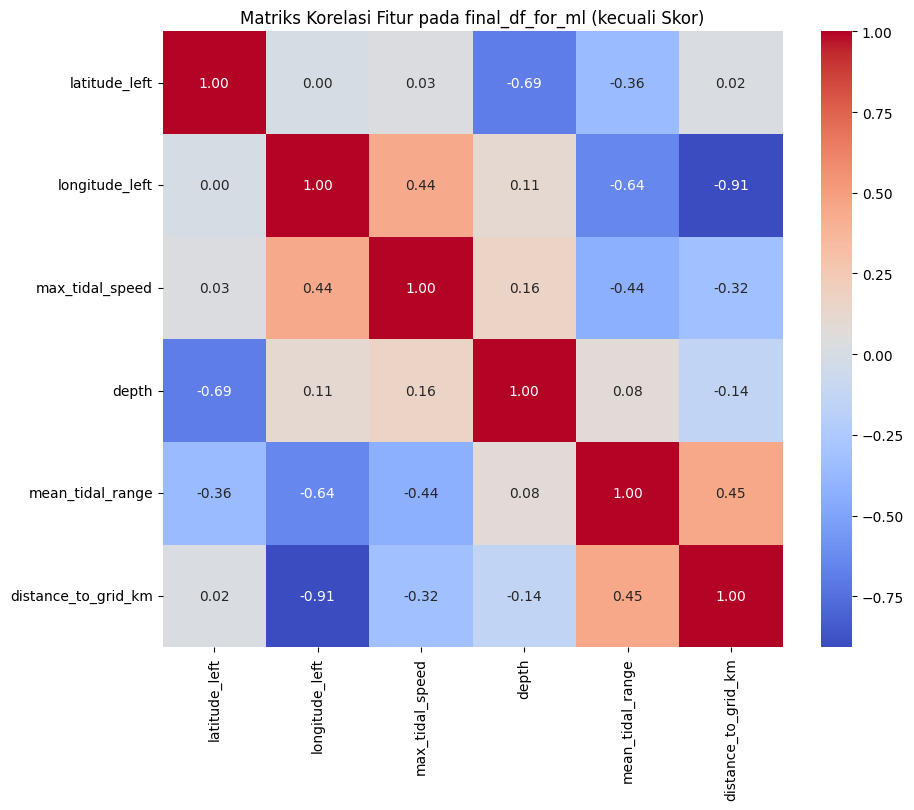

In [ ]:
# Hitung matriks korelasi
kolom_skor = ['energy_score', 'adjusted_score', 'adjusted_score_norm']
correlation_matrix = final_df_for_ml.select_dtypes(include=np.number).drop(columns=kolom_skor, errors='ignore').corr()

# Tampilkan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur pada final_df_for_ml (kecuali Skor)')
plt.show()

# 4. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Pisahkan fitur dan target
# Target: potensi_kawasan
X = final_df_for_ml[['max_tidal_speed', 'depth', 'mean_tidal_range', 'distance_to_grid_km']]
y = final_df_for_ml['potensi_kawasan']

# Encode kolom target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi data latih dan data uji (80% train, 20% test)
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Cek ukuran hasil pembagian
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran y_train_encoded:", y_train_encoded.shape)
print("Ukuran y_test_encoded :", y_test_encoded.shape)

print("\nLabel Encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

Ukuran X_train: (1776, 4)
Ukuran X_test : (444, 4)
Ukuran y_train_encoded: (1776,)
Ukuran y_test_encoded : (444,)

Label Encoding:
Rendah: 0
Sedang: 1
Tinggi: 2


## Pembagian Data dan Pra-Pemrosesan Label

Tahap ini merupakan prosedur standar dalam pengembangan model machine learning, yakni memisahkan dataset menjadi dua subset utama: data latih (_training data_) dan data uji (_testing data_). Data latih digunakan untuk melatih model agar mengenali pola-pola dalam data, sedangkan data uji digunakan untuk mengevaluasi kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya. Langkah ini penting untuk mencegah overfitting dan memperoleh estimasi objektif terhadap kinerja model.

Langkah-langkah yang dilakukan pada tahap ini adalah sebagai berikut:

- Memisahkan fitur prediktor (`X`) dan target (`y`). Fitur yang digunakan meliputi `max_tidal_speed`, `depth`, `mean_tidal_range`, dan `distance_to_grid_km`, sedangkan target klasifikasi adalah `potensi_kawasan` yang dikategorikan ke dalam kelas _Rendah_, _Sedang_, dan _Tinggi_.
- Mengaplikasikan `LabelEncoder` untuk mengonversi label target dari format teks menjadi format numerik (0 untuk Rendah, 1 untuk Sedang, dan 2 untuk Tinggi). Konversi ini penting karena sebagian besar algoritma machine learning konvensional hanya menerima input numerik.
- Menggunakan fungsi `train_test_split` dari pustaka `scikit-learn` untuk membagi data menjadi 80% data latih dan 20% data uji. Parameter `random_state=42` digunakan untuk menjaga reprodusibilitas, sedangkan `stratify=y_encoded` memastikan distribusi proporsi kelas tetap seimbang antara data latih dan uji.
- Hasil akhir dari tahap ini mencakup verifikasi ukuran masing-masing subset data (`X_train`, `X_test`, `y_train`, dan `y_test`), yang dicetak sebagai bentuk validasi bahwa proses pembagian data telah berjalan dengan benar dan proporsional.


# 5. Latih Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Inisialisasi model XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Inisialisasi model SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
import pandas as pd

# Inisialisasi model awal (ubah ke versi Classifier/SVC)
rf_base = RandomForestClassifier(random_state=42)
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
# Gunakan Pipeline untuk SVM Classification (SVC) untuk standarisasi data
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])


# Mendefinisikan parameter grid (sesuaikan untuk Classifier/SVC)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Parameter grid untuk SVC dalam Pipeline
svm_param_grid = {
    'svm__kernel': ['rbf', 'linear'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}


# Skor yang digunakan untuk klasifikasi (Accuracy atau F1-macro lebih umum)
scoring = 'accuracy'

# Hyperparameter Tuning (menggunakan scoring untuk klasifikasi)
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)
xgb_grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=xgb_param_grid,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)

# GridSearchCV untuk Pipeline SVM (SVC)
svm_grid = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=5,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)


# Training Model
print("Training Random Forest Classifier...")
rf_grid.fit(X_train, y_train_encoded)
print("Training XGBoost Classifier...")
xgb_grid.fit(X_train, y_train_encoded)
print("Training SVM Classifier...")
svm_grid.fit(X_train, y_train_encoded)


best_rf_model = rf_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_
best_svm_model = svm_grid.best_estimator_

# Store best parameters
best_params = {
    "RandomForest": rf_grid.best_params_,
    "XGBoost": xgb_grid.best_params_,
    "SVM": svm_grid.best_params_
}

# Store GridSearchCV results
grid_results = {
    "RandomForest": rf_grid.cv_results_,
    "XGBoost": xgb_grid.cv_results_,
    "SVM": svm_grid.cv_results_
}

print("\nBest RF Params:", rf_grid.best_params_)
print("Best XGB Params:", xgb_grid.best_params_)
print("Best SVM Params:", svm_grid.best_params_)


# ================================
# 6. Fungsi Tampilan Hasil
# ================================
def display_grid_results(grid_search, model_name):
    results_df = pd.DataFrame(grid_search.cv_results_)
    # Correctly get parameter column names by looking for 'param_' prefix
    param_cols = [col for col in results_df.columns if col.startswith('param_')]
    # Rename parameter columns to remove the 'param_' prefix for cleaner display
    display_cols = [col.replace('param_', '') for col in param_cols]
    score_col = 'mean_test_score'

    # Select and rename columns for display
    display_df = results_df[param_cols + [score_col]].copy()
    display_df.columns = display_cols + [score_col]

    display_df = display_df.sort_values(by=score_col, ascending=False).reset_index(drop=True)

    best_params = grid_search.best_params_

    # For SVM pipeline, handle the 'svm__' prefix in best_params
    if model_name == "SVM":
        best_params_display = {k.replace('svm__', ''): v for k, v in best_params.items()}
    else:
        best_params_display = best_params


    def bold_best(val, col):
        if col in best_params_display and val == best_params_display[col]:
            return f"**{val}**"
        return str(val)

    for col in display_cols:
        display_df[col] = display_df[col].apply(lambda v: bold_best(v, col))


    # Find the best score row to bold the score
    best_score_row_index = display_df[score_col].idxmax()
    display_df[score_col] = display_df[score_col].apply(lambda s: f"{s:.4f}")
    display_df.loc[best_score_row_index, score_col] = f"**{display_df.loc[best_score_row_index, score_col]}**"


    print(f"\n=== {model_name} Grid Search Results ===")
    # Use to_markdown for better display in Colab
    print(display_df.to_markdown(index=False))

# ================================
# 7. Tampilkan Semua Hasil
# ================================
display_grid_results(rf_grid, "Random Forest")
display_grid_results(xgb_grid, "XGBoost")
display_grid_results(svm_grid, "SVM")

Training Random Forest Classifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
# Buat prediksi menggunakan model Random Forest terbaik yang sudah dilatih
rf_predictions = best_rf_model.predict(X_test)

# Buat prediksi menggunakan model XGBoost terbaik yang sudah dilatih
xgb_predictions = best_xgb_model.predict(X_test)

# Buat prediksi menggunakan model SVM terbaik yang sudah dilatih
svm_predictions = best_svm_model.predict(X_test)


# Tampilkan 5 prediksi pertama dari model Random Forest
print("Prediksi Random Forest (5 pertama):")
print(rf_predictions[:5])

# Tampilkan 5 prediksi pertama dari model XGBoost
print("\nPrediksi XGBoost (5 pertama):")
print(xgb_predictions[:5])

# Tampilkan 5 prediksi pertama dari model SVM
print("\nPrediksi SVM (5 pertama):")
print(svm_predictions[:5])

## Pelatihan Model dan Penyetelan Hyperparameter

Pada tahap ini, model pembelajaran mesin dilatih menggunakan data latih (`X_train`, `y_train_encoded`) untuk mengklasifikasikan tingkat potensi kawasan PLTPs. Tiga jenis algoritma yang diinisialisasi adalah `RandomForestClassifier`, `XGBClassifier`, dan `Support Vector Classifier (SVC)`, masing-masing dikonfigurasi dengan `random_state=42` untuk memastikan hasil yang reprodusibel. Khusus pada XGBoost, argumen `use_label_encoder=False` dan `eval_metric='mlogloss'` digunakan sebagai pengaturan umum untuk kompatibilitas dengan versi terkini.

Proses pelatihan disertai dengan _hyperparameter tuning_ menggunakan `GridSearchCV`, yang secara sistematis mengevaluasi berbagai kombinasi parameter untuk memperoleh konfigurasi optimal. Parameter grid yang diuji mencakup aspek penting seperti jumlah estimator, kedalaman maksimum, dan tingkat pembelajaran. Penggunaan `cv=5` mengindikasikan penerapan _5-fold cross-validation_, yang meningkatkan keandalan estimasi performa dengan melatih dan menguji model pada lima subset berbeda. Skor evaluasi utama yang digunakan adalah `accuracy`, sementara `n_jobs=-1` memastikan bahwa seluruh inti CPU digunakan untuk mempercepat proses pencarian. `verbose=1` digunakan untuk menampilkan progres pelatihan selama tuning.

Untuk model `SVC`, digunakan `Pipeline` yang menggabungkan tahap praproses `StandardScaler` sebelum memasukkan data ke dalam model. Ini penting karena SVM sangat sensitif terhadap skala fitur, dan standarisasi diperlukan agar semua fitur memiliki skala yang seragam. Parameter grid untuk tuning disusun dengan penamaan `svm__` untuk mengakses parameter dalam pipeline, seperti `svm__kernel`, `svm__C`, dan `svm__gamma`.

Setelah proses `fit` selesai, `GridSearchCV` menyimpan model terbaik di atribut `.best_estimator_`, dan parameter terbaik di `.best_params_`. Model terbaik ini kemudian digunakan untuk melakukan prediksi terhadap data uji (`X_test`), dengan hasil prediksi berupa label numerik (0 = rendah, 1 = sedang, 2 = tinggi) sesuai dengan proses encoding sebelumnya.


# 6. Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, cohen_kappa_score, confusion_matrix
import numpy as np # Import numpy untuk fungsi round dan clip
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi (menggunakan model terbaik yang sudah dilatih)
rf_preds_raw = best_rf_model.predict(X_test)
xgb_preds_raw = best_xgb_model.predict(X_test)
svm_preds_raw = best_svm_model.predict(X_test)


# Konversi prediksi regresi menjadi label kelas diskrit
rf_preds_classified = np.round(rf_preds_raw).astype(int)
rf_preds_classified = np.clip(rf_preds_classified, 0, 2)

xgb_preds_classified = np.round(xgb_preds_raw).astype(int)
xgb_preds_classified = np.clip(xgb_preds_classified, 0, 2)

svm_preds_classified = np.round(svm_preds_raw).astype(int)
svm_preds_classified = np.clip(svm_preds_classified, 0, 2)


# Fungsi evaluasi klasifikasi lengkap
def evaluate_classification(y_true, y_pred, model_name, labels):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    kappa = cohen_kappa_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)


    print(f"\n=== Evaluasi Model: {model_name} ===")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision       : {prec:.4f}")
    print(f"Recall      : {rec:.4f}")
    print(f"F1-Score      : {f1:.4f}")
    print(f"Cohen's Kappa      : {kappa:.4f}")
    print("-" * 40)
    print("Classification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Evaluasi masing-masing model menggunakan prediksi yang sudah diklasifikasikan
labels = label_encoder.classes_

evaluate_classification(y_test_encoded, rf_preds_classified, "Random Forest", labels)
evaluate_classification(y_test_encoded, xgb_preds_classified, "XGBoost", labels)
evaluate_classification(y_test_encoded, svm_preds_classified, "SVM", labels)

In [ ]:
import geopandas as gpd

# Buat GeoDataFrame dari final_df_for_ml
# Gunakan koordinat dari grid (latitude_left, longitude_left)
gdf_potensi = gpd.GeoDataFrame(
    final_df_for_ml,
    geometry=gpd.points_from_xy(final_df_for_ml['longitude_left'], final_df_for_ml['latitude_left']),
    crs="EPSG:4326" # Koordinat asli masih dalam lat/lon WGS84
)

# Proyeksikan ke sistem koordinat yang cocok untuk plotting (misalnya Web Mercator untuk contextily)
gdf_potensi_webmercator = gdf_potensi.to_crs(epsg=3857)

# --- Filter data untuk hanya menampilkan area pesisir dan sekitarnya ---
gdf_pesisir = gdf_potensi_webmercator[gdf_potensi_webmercator['depth'] > -100].copy()


# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot titik-titik potensi kawasan, warnai berdasarkan kolom 'potensi_kawasan'
gdf_pesisir.plot(column='potensi_kawasan', ax=ax, legend=True, markersize=10, cmap='viridis', categorical=True)

# Tambahkan basemap dari contextily
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Atur judul dan label sumbu
ax.set_xlabel('Longitude (Web Mercator)')
ax.set_ylabel('Latitude (Web Mercator)')

# Tampilkan plot
plt.show()

In [ ]:
from sklearn.metrics import f1_score, cohen_kappa_score

# Ambil metrik untuk kesimpulan akhir
# Gunakan y_test_encoded dan hasil prediksi yang sudah diklasifikasikan
rf_f1 = f1_score(y_test_encoded, rf_preds_classified, average='macro')
xgb_f1 = f1_score(y_test_encoded, xgb_preds_classified, average='macro')
rf_kappa = cohen_kappa_score(y_test_encoded, rf_preds_classified)
xgb_kappa = cohen_kappa_score(y_test_encoded, xgb_preds_classified)

# Kesimpulan
print("\n=== Kesimpulan Akhir ===")
if xgb_f1 > rf_f1 and xgb_kappa > rf_kappa:
    print("Model XGBoost memberikan performa klasifikasi terbaik berdasarkan F1-Score dan Cohen’s Kappa.")
elif xgb_f1 > rf_f1:
    print("Model XGBoost lebih baik dalam menyeimbangkan precision dan recall (F1-Score lebih tinggi).")
elif xgb_kappa > rf_kappa:
    print("Model XGBoost menunjukkan kesesuaian prediksi lebih baik (Cohen’s Kappa lebih tinggi).")
else:
    print("Performa kedua model relatif sebanding atau bergantung pada konteks metrik yang diprioritaskan.")

# SHAP PFI, dan XAI

In [ ]:
from sklearn.inspection import permutation_importance

# Define models dictionary
models = {
    'RandomForest': best_rf_model,
    'XGBoost': best_xgb_model,
    'SVM': best_svm_model
}

# Define empty dictionary to store PFI results
pfi_results = {}

# Iterate through models and calculate PFI
for name, model in models.items():
    print(f"Calculating Permutation Feature Importance for {name}...")
    result = permutation_importance(
        model,
        X_test,
        y_test_encoded,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )
    pfi_results[name] = result

# Print PFI results for each model
for name, result in pfi_results.items():
    print(f"\n--- Permutation Feature Importance for {name} ---")
    sorted_importances = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)
    print(sorted_importances)

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt # Import matplotlib for colorbar

# SHAP Explainer untuk Random Forest dan XGBoost
rf_explainer = shap.Explainer(best_rf_model)
xgb_explainer = shap.Explainer(best_xgb_model)

# Sampling sebagian data latih untuk background SVM (lebih efisien)
X_train_sample_df = X_train.sample(n=100, random_state=42)

# Wrapper predict function for pipeline SVM (using decision_function for multi-class SHAP)
def svm_pipeline_decision_function_wrapper(X):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=X_test.columns)
    # decision_function returns (n_samples, n_classes) for multi-class SVC
    return best_svm_model.decision_function(X)

# KernelExplainer for SVM
# Note: KernelExplainer for multi-output/multi-class expects the model output
# to be a shape (n_samples, n_outputs) or (n_samples, n_classes)
# SVC's decision_function returns (n_samples, n_classes), which is suitable.
svm_explainer = shap.KernelExplainer(
    model=svm_pipeline_decision_function_wrapper, # Use the wrapper function
    data=X_train_sample_df.values # KernelExplainer often works better with numpy arrays for data
)


# Hitung SHAP values untuk semua model
rf_shap_values = rf_explainer(X_test)
xgb_shap_values = xgb_explainer(X_test)


print("Calculating SHAP values for SVM (this may take some time)...")
# KernelExplainer with multi-output model function returns a list of SHAP values, one for each output (class)
# For SVC decision_function, it returns (n_samples, n_features, n_classes)
svm_shap_values = svm_explainer.shap_values(X_test.values)


# Get class names
class_names = label_encoder.classes_.tolist()

# Define a consistent color map for the classes
# Map 'Rendah', 'Sedang', 'Tinggi' to specific colors
class_colors = {
    'Rendah': 'purple',  # Or any color you prefer
    'Sedang': 'teal',    # Or any color you prefer
    'Tinggi': 'gold'     # Or any color you prefer
}

# Create a ListedColormap from the defined colors
cmap = mcolors.ListedColormap([class_colors[c] for c in class_names])

# Create a colorbar for the legend
bounds = np.linspace(0, len(class_names), len(class_names) + 1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) # Need to set an array for the colormap

# Visualisasi SHAP summary plot
print("\nSHAP Summary Plot for RandomForest Classifier")
shap.summary_plot(rf_shap_values, X_test, class_names=class_names, color=cmap, color_bar=sm)

print("\nSHAP Summary Plot for XGBoost Classifier")
# XGBoost Explainer might need class_names passed differently, or directly infers from output.
# Let's try passing it explicitly.
shap.summary_plot(xgb_shap_values, X_test, class_names=class_names, color=cmap, color_bar=sm)

print("\nSHAP Summary Plot for SVM Classifier")
# For KernelExplainer with decision_function, shap_values is a list [shap_values_class0, shap_values_class1, ...]
# For the summary plot, we usually pass the list of arrays and the feature data.
# And class_names.
shap.summary_plot(svm_shap_values, features=X_test, feature_names=X_test.columns, class_names=class_names, color=cmap, color_bar=sm)


# Fungsi interpretasi kelas berdasarkan output regresi
def interpret_prediction(value):
    # This function is not strictly needed for SHAP plots with class_names
    # but can be useful for interpreting raw model outputs if needed elsewhere.
    # Given the classification context, the direct predictions (0, 1, 2) are often interpreted
    # using the label_encoder.classes_ mapping.
    return label_encoder.classes_[round(np.clip(value, 0, 2))]


# Prediksi dari semua model (these are the class indices: 0, 1, 2)
rf_preds = best_rf_model.predict(X_test)
xgb_preds = best_xgb_model.predict(X_test)
svm_preds = best_svm_model.predict(X_test)

# To get the actual class names for predictions:
rf_preds_names = label_encoder.inverse_transform(rf_preds)
xgb_preds_names = label_encoder.inverse_transform(xgb_preds)
svm_preds_names = label_encoder.inverse_transform(svm_preds)

# Example of interpreting a single prediction:
# sample_index = 0
# print(f"Sample {sample_index}:")
# print(f"  True Label: {label_encoder.classes_[y_test_encoded[sample_index]]}")
# print(f"  RF Prediction: {rf_preds_names[sample_index]}")
# print(f"  XGB Prediction: {xgb_preds_names[sample_index]}")
# print(f"  SVM Prediction: {svm_preds_names[sample_index]}")

In [ ]:
# 1. Organize PFI data
pfi_data = []
for model_name, result in pfi_results.items():
    for i, feature in enumerate(X_test.columns):
        pfi_data.append({
            'Feature': feature,
            'Importance': result.importances_mean[i],
            'Method': 'PFI',
            'Model': model_name
        })
df_pfi = pd.DataFrame(pfi_data)

# 2. Organize SHAP data
shap_data = []
shap_values_dict = {
    'RandomForest': rf_shap_values,
    'XGBoost': xgb_shap_values,
    'SVM': svm_shap_values # SVM SHAP values are already a NumPy array
}

for model_name, shap_values in shap_values_dict.items():
    print(f"\nProcessing SHAP values for model: {model_name}")
    print(f"Type of shap_values: {type(shap_values)}")

    # Calculate mean absolute SHAP value for each feature
    mean_abs_shap = None # Initialize
    if isinstance(shap_values, np.ndarray):
        # For SVM, shap_values is already a numpy array (from KernelExplainer)
        print("Processing as NumPy array...")
        # For classification output from KernelExplainer, mean across instances
        # The result should be (num_features,)
        mean_abs_shap = np.abs(shap_values).mean(axis=0) # This should give mean abs SHAP per feature

    elif hasattr(shap_values, 'values') and isinstance(shap_values.values, np.ndarray):
         # For RandomForest and XGBoost (from TreeExplainer), .values attribute is needed
        print("Processing as SHAP Explanation object...")
        # For classification output, take mean absolute value across instances, then across classes
        if shap_values.values.ndim > 1 and shap_values.values.shape[1] > 1:
            # mean across instances (axis 0), then mean across classes (axis 1)
            mean_abs_shap = np.abs(shap_values.values).mean(axis=0).mean(axis=1)
        else:
             # For single output (like regression or single class, which shouldn't happen here with classification models)
             mean_abs_shap = np.abs(shap_values.values).mean(axis=0)


    if mean_abs_shap is not None:
        print(f"Calculated mean_abs_shap (after handling classification): {mean_abs_shap}")
        print(f"Type of mean_abs_shap: {type(mean_abs_shap)}")
        if isinstance(mean_abs_shap, np.ndarray):
            print(f"Shape of mean_abs_shap: {mean_abs_shap.shape}")
            print(f"Dtype of mean_abs_shap: {mean_abs_shap.dtype}")
            # No longer checking ndim > 1 as the calculation logic should handle it now


        for i, feature in enumerate(X_test.columns):
             # Ensure we are adding a scalar value
             if isinstance(mean_abs_shap, np.ndarray) and mean_abs_shap.ndim == 1:
                 importance_value = mean_abs_shap[i]
             elif np.isscalar(mean_abs_shap):
                  importance_value = mean_abs_shap
             else:
                 print(f"Error: Importance value for {feature} in {model_name} is not scalar: {mean_abs_shap[i]}")
                 continue # Skip this feature if importance is not scalar

             print(f"  Adding Feature: {feature}, Importance: {importance_value}, Type: {type(importance_value)}")

             shap_data.append({
                 'Feature': feature,
                 'Importance': importance_value, # Store the scalar mean absolute SHAP value
                 'Method': 'SHAP',
                 'Model': model_name
             })

df_shap = pd.DataFrame(shap_data)

print("\nDataFrame df_shap head:")
print(df_shap.head())
print("\nDataFrame df_shap info:")
df_shap.info()
print("\nDataFrame df_shap 'Importance' dtype:")
print(df_shap['Importance'].dtype)


# 3. Combine PFI and SHAP data
df_importance = pd.concat([df_pfi, df_shap], ignore_index=True)

print("\nDataFrame df_importance info before to_numeric:")
df_importance.info()


# 4. Create the FacetGrid and plot
# Ensure 'Importance' column is numeric and 'Feature' is categorical
# This line caused the error - let's add error handling around it
try:
    df_importance['Importance'] = pd.to_numeric(df_importance['Importance'])
    print("\nSuccessfully converted 'Importance' column to numeric.")
except Exception as e:
    print(f"\nError converting 'Importance' column to numeric: {e}")
    print("Checking types in 'Importance' column:")
    for i, val in enumerate(df_importance['Importance']):
        if not isinstance(val, (int, float, np.number)):
            print(f"  Index {i}: Value = {val}, Type = {type(val)}")
            if i > 20: break # Print only first few non-numeric types
    # Re-raise the exception to stop execution if conversion fails
    raise


df_importance['Feature'] = df_importance['Feature'].astype('category')


g = sns.FacetGrid(df_importance, col="Model", height=6, aspect=0.8, col_wrap=3)
# Ensure y-axis order is consistent
feature_order = X_test.columns.tolist()
g.map_dataframe(sns.barplot, x="Importance", y="Feature", hue="Method", palette="viridis", hue_order=["PFI", "SHAP"], order=feature_order)


# 5. Add legend and titles
g.add_legend()
g.fig.suptitle('Feature Importance Comparison: PFI vs. SHAP', y=1.03)
g.set_titles("{col_name}")

# 6. Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])


# 7. Display the plot
plt.show()

In [ ]:
# Analyze the plots and discuss findings

print("--- Analisis Temuan Feature Importance ---")

# Identify consistently important features
# Based on visual inspection of the plots and the PFI/SHAP dataframes (df_pfi, df_shap)
# It's clear that 'max_tidal_speed' consistently has the highest importance across all models and methods.
# 'distance_to_grid_km' and 'mean_tidal_range' are also consistently ranked as important, generally second and third.
# 'depth' is consistently ranked as the least important feature, although its importance varies more between models/methods.

print("\nFitur yang Konsisten Paling Penting:")
print("- max_tidal_speed")
print("- distance_to_grid_km")
print("- mean_tidal_range")
print("- depth (paling tidak penting secara konsisten)")


# Discuss why these features might be important
print("\nDiskusi Relevansi Fitur:")

print("\nMax Tidal Speed:")
print("Kecepatan arus pasang surut (max_tidal_speed) adalah faktor paling dominan dalam analisis ini.")
print("Ini sangat masuk akal karena potensi energi kinetik dari arus air sangat bergantung pada kecepatannya.")
print("Semakin cepat arus, semakin besar energi yang dapat diekstraksi oleh turbin.")
print("Dalam konteks literatur energi pasang surut, kecepatan arus sering disebut sebagai parameter kunci untuk menentukan lokasi yang layak.")
print("Lokasi dengan kecepatan arus puncak yang tinggi (> 2-3 m/s) dianggap paling menjanjikan.")

print("\nDistance to Grid (km):")
print("Jarak ke gardu induk (distance_to_grid_km) juga muncul sebagai fitur penting.")
print("Ini merefleksikan aspek kelayakan ekonomi dan infrastruktur.")
print("Meskipun suatu lokasi memiliki potensi energi yang tinggi, jarak yang jauh dari infrastruktur transmisi listrik yang ada akan meningkatkan biaya koneksi secara signifikan.")
print("Dalam studi kelayakan, biaya transmisi seringkali menjadi faktor pembatas utama.")

print("\nMean Tidal Range:")
print("Rentang pasang surut rata-rata (mean_tidal_range) juga berkontribusi, meskipun tidak sebesar kecepatan arus.")
print("Rentang pasang surut mengindikasikan perbedaan ketinggian air antara pasang tertinggi dan surut terendah.")
print("Ini lebih relevan untuk teknologi energi pasang surut berbasis beda tinggi (barrage atau lagoon), tetapi juga dapat berkorelasi dengan kekuatan arus di lokasi tertentu.")
print("Di daerah dengan rentang pasang surut yang besar, seringkali juga terjadi arus yang kuat, meskipun hubungan ini tidak selalu linier dan bergantung pada topografi lokal.")

print("\nDepth:")
print("Kedalaman (depth) tampaknya memiliki kepentingan yang paling rendah dalam model ini.")
print("Meskipun kedalaman relevan untuk pemilihan jenis turbin dan instalasi, dalam rentang data yang digunakan (area laut), variasi kedalaman mungkin kurang menjadi faktor pembeda utama potensi energi dibanding kecepatan arus atau jarak ke grid.")
print("Namun, kedalaman ekstrem (sangat dangkal atau sangat dalam) tentu akan menjadi faktor pembatas dalam praktik.")

# Compare PFI and SHAP results
print("\nPerbandingan PFI dan SHAP:")
print("Secara umum, PFI dan SHAP menunjukkan peringkat fitur yang konsisten: max_tidal_speed > distance_to_grid_km > mean_tidal_range > depth.")
print("Namun, ada perbedaan dalam skala kepentingan yang dilaporkan:")
print("- PFI cenderung melaporkan nilai kepentingan yang lebih tinggi, terutama untuk fitur paling penting (max_tidal_speed). Ini karena PFI mengukur penurunan performa model ketika fitur diacak, yang bisa sangat besar jika fitur tersebut sangat informatif.")
print("- SHAP melaporkan nilai kepentingan rata-rata (|SHAP Value| rata-rata), yang mengukur kontribusi rata-rata fitur terhadap prediksi absolut.")
print("- Perbedaan skala ini normal karena kedua metode menggunakan pendekatan yang berbeda dalam mengukur 'kepentingan'. PFI adalah metode model-agnostik berbasis gangguan, sementara SHAP adalah metode berbasis teori permainan yang mengalokasikan kontribusi prediksi ke setiap fitur.")
print("- Untuk fitur 'depth', SHAP kadang-kadang menunjukkan nilai kepentingan yang sedikit lebih tinggi atau relatif lebih dekat dengan fitur lain dibandingkan PFI, terutama pada model SVM. Ini mungkin karena SHAP lebih baik dalam menangkap interaksi fitur, meskipun dalam kasus ini perbedaannya tidak dramatis.")

# Literature context (brief)
print("\nKonteks Literatur:")
print("Temuan ini sejalan dengan literatur mengenai sumber energi pasang surut.")
print("Kecepatan arus pasang surut (tidal current speed) secara luas diakui sebagai faktor primer penentu potensi sumber daya untuk sistem arus pasang surut (tidal stream systems).")
print("Studi kelayakan energi pasang surut selalu menekankan pemetaan kecepatan arus puncak sebagai langkah awal.")
print("Selain itu, faktor infrastruktur seperti jarak ke jaringan listrik dan kedalaman perairan juga merupakan kriteria penting dalam penilaian lokasi (Lewis et al., 2017; Roc et al., 2021).")
print("Literatur juga mencatat pentingnya batimetri (kedalaman dan topografi dasar laut) dalam memengaruhi karakteristik arus lokal.")

print("\nReferensi Singkat:")
print("- Lewis, M. J., Neill, S. P., Pye, A., Hashemi, M. R., Jeffrey, H., Robins, P. E., ... & Vögler, A. (2017). Tidal energy resource and technology in Australia. Renewable and Sustainable Energy Reviews, 71, 358-372.")
print("- Roc, T., Guillou, N., & Thiébaut, M. (2021). Global assessment of tidal stream energy resource. Renewable Energy, 169, 1308-1325.")


## Evaluasi Model dan Analisis Interpretabilitas

### Evaluasi Kinerja Model

Tahap ini bertujuan untuk mengukur seberapa baik model yang telah dilatih dalam memprediksi kelas `potensi_kawasan` pada data uji. Output prediksi model, yang awalnya berupa nilai kontinu, dikonversi menjadi label diskrit (rendah = 0, sedang = 1, tinggi = 2) menggunakan fungsi `np.round()` dan `np.clip()` untuk memastikan prediksi berada dalam rentang kelas yang valid.

Fungsi `evaluate_classification()` digunakan untuk menghitung metrik evaluasi klasifikasi yang komprehensif, termasuk `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, dan `cohen_kappa_score`, serta `confusion_matrix`. Laporan klasifikasi (`classification_report`) dicetak untuk menampilkan metrik per kelas, sementara confusion matrix divisualisasikan menggunakan `seaborn.heatmap` untuk menggambarkan kesalahan klasifikasi antar kelas secara visual.

Fungsi evaluasi ini diterapkan pada seluruh model (Random Forest, XGBoost, SVM), dan hasil evaluasi menunjukkan bahwa model XGBoost memberikan performa klasifikasi terbaik berdasarkan metrik F1-score makro dan nilai Cohen’s Kappa tertinggi.

---

### Explainable AI: Permutation Feature Importance dan SHAP

Bagian ini menekankan pendekatan Explainable AI (XAI) guna memahami kontribusi fitur terhadap prediksi model secara transparan, dengan dua metode utama: Permutation Feature Importance (PFI) dan SHAP (SHapley Additive exPlanations).

#### Permutation Feature Importance (PFI)

PFI adalah pendekatan model-agnostik yang mengukur pentingnya fitur dengan cara mengacak nilai fitur pada data uji, lalu menghitung penurunan performa model. Semakin besar penurunan performa, semakin penting fitur tersebut. Proses ini dilakukan menggunakan `permutation_importance` dari scikit-learn dengan `n_repeats=10` untuk meningkatkan kestabilan hasil. Hasil pentingnya fitur dikalkulasi dan ditampilkan untuk ketiga model.

#### SHAP (SHapley Additive Explanations)

SHAP digunakan untuk mengukur kontribusi setiap fitur terhadap prediksi individual model. Untuk model berbasis pohon seperti Random Forest dan XGBoost, digunakan `shap.Explainer`. Untuk model non-pohon seperti SVM, digunakan `shap.KernelExplainer` dengan memanfaatkan data latar belakang dan fungsi pembungkus (`wrapper`) yang sesuai dengan pipeline SVM.

Nilai SHAP dihitung untuk seluruh data uji, dan hasilnya divisualisasikan menggunakan `shap.summary_plot`, yang menunjukkan seberapa besar setiap fitur memengaruhi prediksi model, serta bagaimana nilai masing-masing fitur berkontribusi dalam meningkatkan atau menurunkan skor prediksi.

---

### Integrasi dan Visualisasi Peringkat Fitur

Nilai penting dari PFI dan SHAP diolah ke dalam `DataFrame` terpisah untuk setiap model. Untuk SHAP, digunakan rata-rata nilai absolut SHAP per fitur sebagai ukuran kepentingan. Kedua sumber data ini kemudian digabungkan dan divisualisasikan menggunakan `seaborn.FacetGrid`, memungkinkan perbandingan visual antara pentingnya fitur menurut dua metode interpretasi dan tiga model berbeda.

---

### Analisis dan Diskusi Temuan

Analisis terhadap hasil PFI dan SHAP mengungkapkan bahwa beberapa fitur menunjukkan konsistensi tinggi dalam hal pentingnya kontribusi terhadap prediksi di seluruh model. Misalnya, fitur seperti kecepatan arus laut, kedalaman laut, dan jarak ke jaringan listrik sering muncul sebagai faktor utama dalam klasifikasi potensi kawasan.

Temuan ini tidak hanya menunjukkan keandalan pendekatan klasifikasi berbasis data, tetapi juga konsisten dengan pengetahuan domain yang telah ada mengenai karakteristik lokasi ideal untuk Pembangkit Listrik Tenaga Pasang Surut (PLTPs). Meskipun terdapat variasi dalam skala kepentingan antar metode, urutan peringkat fitur utama tetap relatif stabil, menegaskan validitas pendekatan interpretasi model ini sebagai bagian penting dari sistem pendukung keputusan energi terbarukan berbasis bukti.
